In [86]:
import pandas as pd
from urllib.request import urlopen
from urllib.parse import quote
from rdkit import Chem
from rdkit.Chem import Descriptors
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Lista identyfikatorów
identifiers = [
    "methanol", "ethanol", "1-propanol", "2-propanol", "1-butanol", "cyclohexanol", 
    "1-hexadecanol", "ethylene glycol", "propylene glycol", "glycerol", 
    "hexane-1,2,3,4,5,6-hexol", "heptane-1,2,3,4,5,6,7-heptol", "2-propen-1-ol", 
    "3,7-dimethylocta-2,6-dien-1-ol", "inositol", "menthol", "furosemide", 
    "clonidine", "iodine", "potassium iodine", "timolol", "minoxidil", 
    "hydralazine", "amlodipine"
]

# Funkcja do konwersji identyfikatorów na SMILES
def CIRconvert(ids):
    try:
        url = f'http://cactus.nci.nih.gov/chemical/structure/{quote(ids)}/smiles'
        return urlopen(url).read().decode('utf8')
    except:
        return 'Did not work'

# Pobieranie SMILES dla każdego identyfikatora
smiles_list = [CIRconvert(ids) for ids in identifiers]

# Funkcja do obliczania deskryptorów
def smi_to_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = {}
    if mol:
        for desc_name, desc_func in Descriptors.descList:
            descriptors[desc_name] = desc_func(mol) if mol else None
    return descriptors

# Tworzenie DataFrame
dataset = pd.DataFrame({'Names': identifiers, 'Smiles': smiles_list})
descriptor_data = [smi_to_descriptors(smile) for smile in smiles_list]
descriptor_df = pd.DataFrame(descriptor_data)

# Połączenie danych i deskryptorów
final_dataset = pd.concat([dataset, descriptor_df], axis=1)


In [87]:
final_dataset

,Names,Smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,methanol,CO,7.000000,7.000000,1.000000,1.000000,0.385284,3.000000,32.042,28.010,...,0,0,0,0,0,0,0,0,0,0
1,ethanol,CCO,7.569444,7.569444,0.250000,0.250000,0.406808,6.000000,46.069,40.021,...,0,0,0,0,0,0,0,0,0,0
2,1-propanol,CCCO,7.875000,7.875000,0.319444,0.319444,0.463784,7.500000,60.096,52.032,...,0,0,0,0,0,0,0,0,0,0
3,2-propanol,CC(C)O,8.055556,8.055556,0.166667,-0.166667,0.428405,9.000000,60.096,52.032,...,0,0,0,0,0,0,0,0,0,0
4,1-butanol,CCCCO,8.066250,8.066250,0.343750,0.343750,0.512822,8.400000,74.123,64.043,...,0,0,0,0,0,0,0,0,0,0
5,cyclohexanol,OC1CCCCC1,8.909167,8.909167,0.035880,0.035880,0.486325,25.285714,100.161,88.065,...,0,0,0,0,0,0,0,0,0,0
6,1-hexadecanol,CCCCCCCCCCCCCCCCO,8.643400,8.643400,0.373047,0.373047,0.400968,10.941176,242.447,208.175,...,0,0,0,0,0,0,0,0,12,0
7,ethylene glycol,OCCO,7.625000,7.625000,0.125000,-0.125000,0.407528,7.500000,62.068,56.020,...,0,0,0,0,0,0,0,0,0,0
8,propylene glycol,CC(O)CO,8.111111,8.111111,0.138889,-0.560185,0.435835,15.000000,76.095,68.031,...,0,0,0,0,0,0,0,0,0,0
9,glycerol,OCC(O)CO,8.166667,8.166667,0.364583,-0.953704,0.381494,10.000000,92.094,84.030,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
only_num = dataset.select_dtypes(include='number')

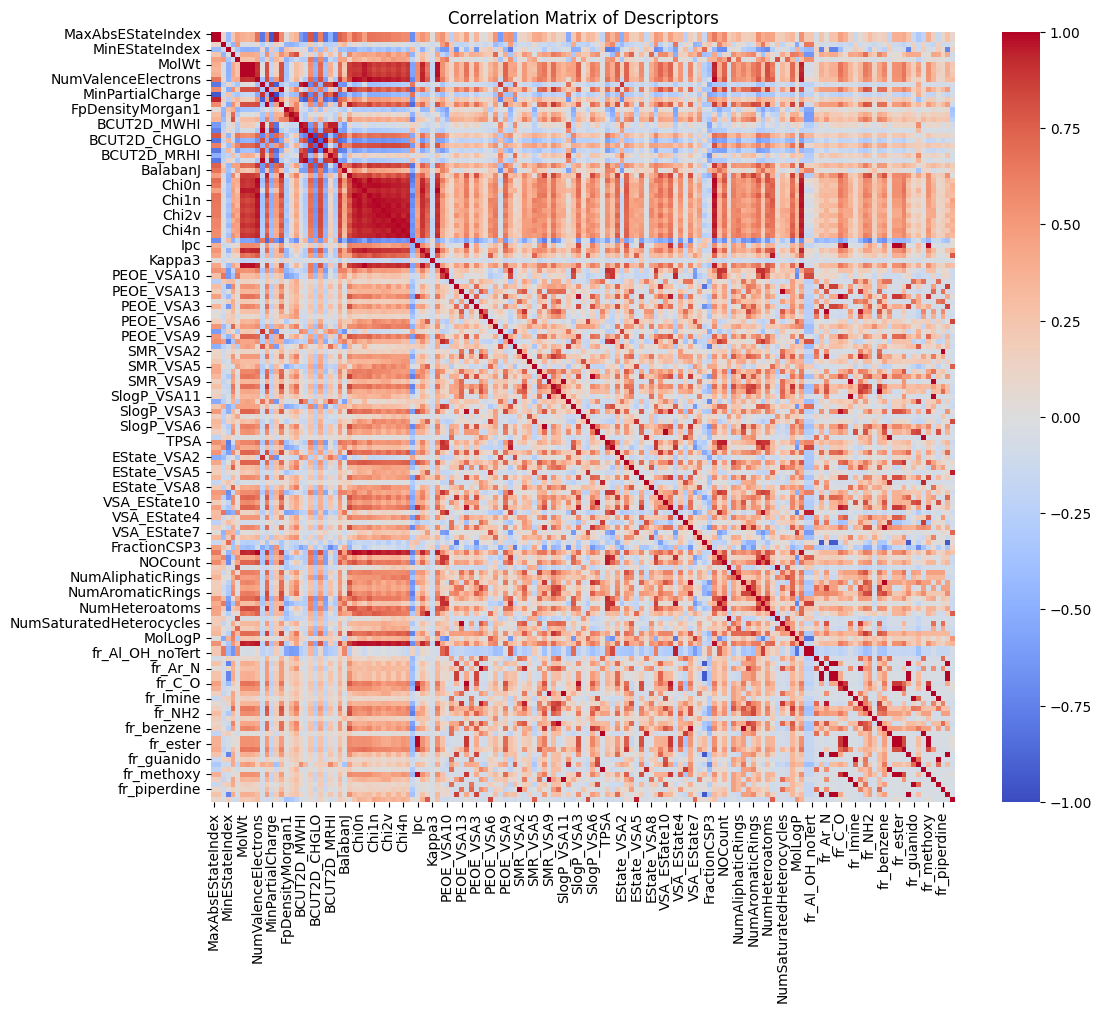

In [ ]:
correlation_matrix = only_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Matrix of Descriptors")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from scipy.cluster.hierarchy import dendrogram, linkage

# Wczytanie danych
df = pd.read_csv('dataset.csv')
# Wybór tylko danych liczbowych dla PCA
numeric_df = df.select_dtypes(include=[np.number])
# Usunięcie wierszy z brakującymi wartościami
numeric_df.dropna(inplace=True)

# Standaryzacja danych
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_df)




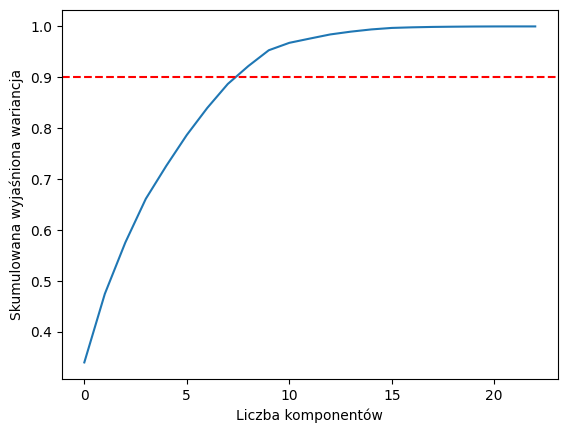

In [ ]:
pca = PCA().fit(numeric_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba komponentów')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.axhline(y=0.9, color='r', linestyle='--')  # Linia pozioma dla 90% wariancji
plt.show()


In [ ]:
name=[]
for i in dataset['Names']:
  name.append(i)
name

['methanol',
 'ethanol',
 '1-propanol',
 '2-propanol',
 '1-butanol',
 'cyclohexanol',
 '1-hexadecanol',
 'ethylene glycol',
 'propylene glycol',
 'glycerol',
 'hexane-1,2,3,4,5,6-hexol',
 'heptane-1,2,3,4,5,6,7-heptol',
 '2-propen-1-ol',
 '3,7-dimethylocta-2,6-dien-1-ol',
 'inositol',
 'menthol',
 'furosemide',
 'clonidine',
 'iodine',
 'potassium iodine',
 'timolol',
 'minoxidil',
 'hydralazine',
 'amlodipine']

In [ ]:
name

['methanol',
 'ethanol',
 '1-propanol',
 '2-propanol',
 '1-butanol',
 'cyclohexanol',
 '1-hexadecanol',
 'ethylene glycol',
 'propylene glycol',
 'glycerol',
 'hexane-1,2,3,4,5,6-hexol',
 'heptane-1,2,3,4,5,6,7-heptol',
 '2-propen-1-ol',
 '3,7-dimethylocta-2,6-dien-1-ol',
 'inositol',
 'menthol',
 'furosemide',
 'clonidine',
 'iodine',
 'potassium iodine',
 'timolol',
 'minoxidil',
 'hydralazine',
 'amlodipine']

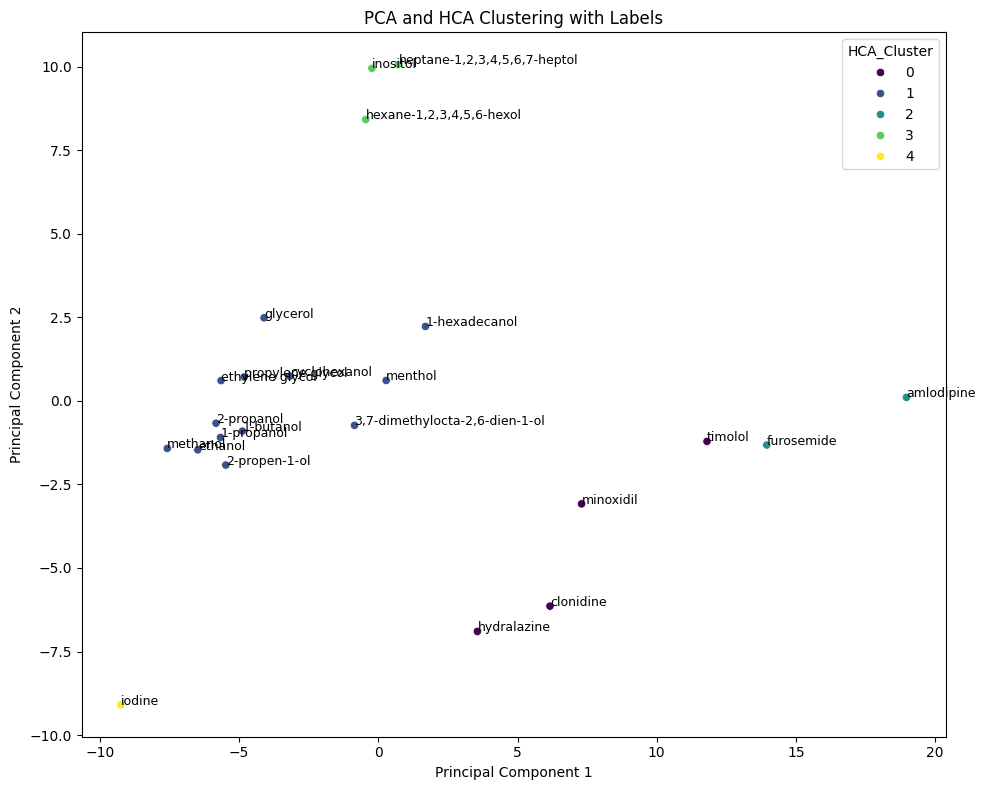

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = 'dataset.xlsx'  # Replace with your actual file path
dataset = pd.read_excel(dataset_path)

# Drop the first column which just seems to be an index.
dataset = dataset.drop(columns=dataset.columns[0])

# Remove rows with NaN values in any column
dataset_cleaned = dataset.dropna()

# Separate out the names for later use
compound_names = dataset_cleaned['Names']

# Standardizing the data (excluding 'Names' and 'Smiles' columns)
scaler = StandardScaler()
numeric_cols = dataset_cleaned.columns.drop(['Names', 'Smiles'])
numeric_scaled_cleaned = scaler.fit_transform(dataset_cleaned[numeric_cols])

# Performing PCA on the cleaned and scaled numeric data
pca = PCA(n_components=2)  # We use 2 components for 2D plotting
pca_result_cleaned = pca.fit_transform(numeric_scaled_cleaned)

# Creating a DataFrame for PCA results
pca_df_cleaned = pd.DataFrame(data=pca_result_cleaned, columns=['PC1', 'PC2'])

# Adding 'Names' to the PCA DataFrame
pca_df_cleaned['Names'] = compound_names.values

# Performing Agglomerative Hierarchical Clustering
hca = AgglomerativeClustering(n_clusters=5)  # Number of clusters can be adjusted
hca_labels = hca.fit_predict(numeric_scaled_cleaned)

# Adding the cluster labels to the DataFrame
pca_df_cleaned['HCA_Cluster'] = hca_labels

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='HCA_Cluster', data=pca_df_cleaned, palette='viridis', legend="full")

# Adding labels to each point
for i, txt in enumerate(pca_df_cleaned['Names']):
    plt.annotate(txt, (pca_df_cleaned['PC1'][i], pca_df_cleaned['PC2'][i]), fontsize=9)

# Adjusting plot aesthetics
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and HCA Clustering with Labels')
plt.legend(title='HCA_Cluster')
plt.tight_layout()

# Show the plot
plt.show()


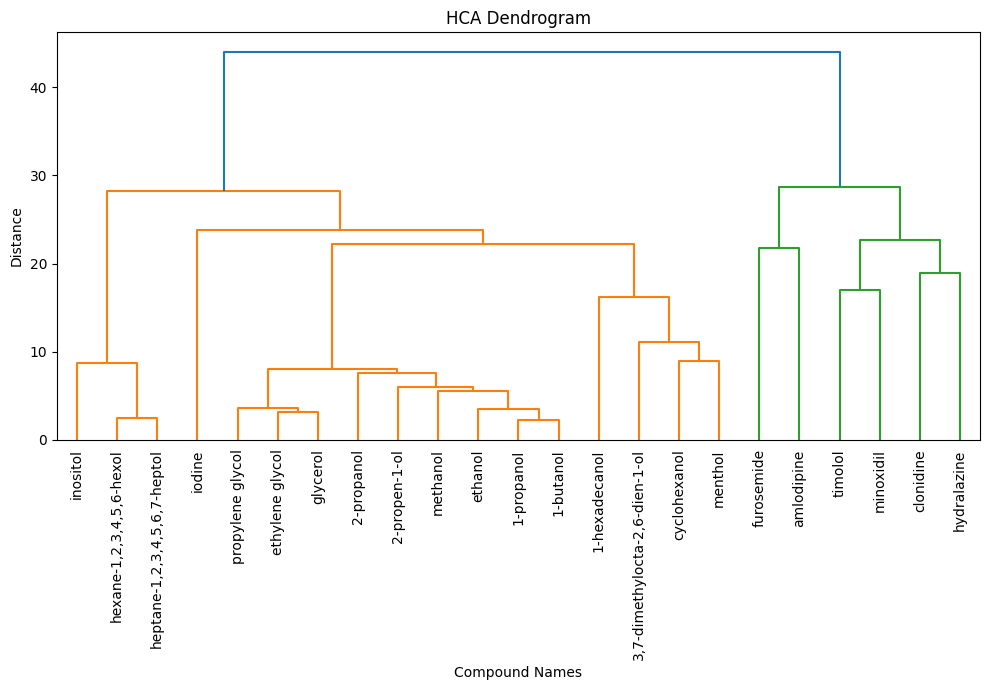

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# We already have our scaled data from previous steps: `numeric_scaled_cleaned`
# Now we use the linkage function to compute the hierarchical clustering
linked = linkage(numeric_scaled_cleaned, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=compound_names.values, leaf_rotation=90, leaf_font_size=10)
plt.title('HCA Dendrogram')
plt.xlabel('Compound Names')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


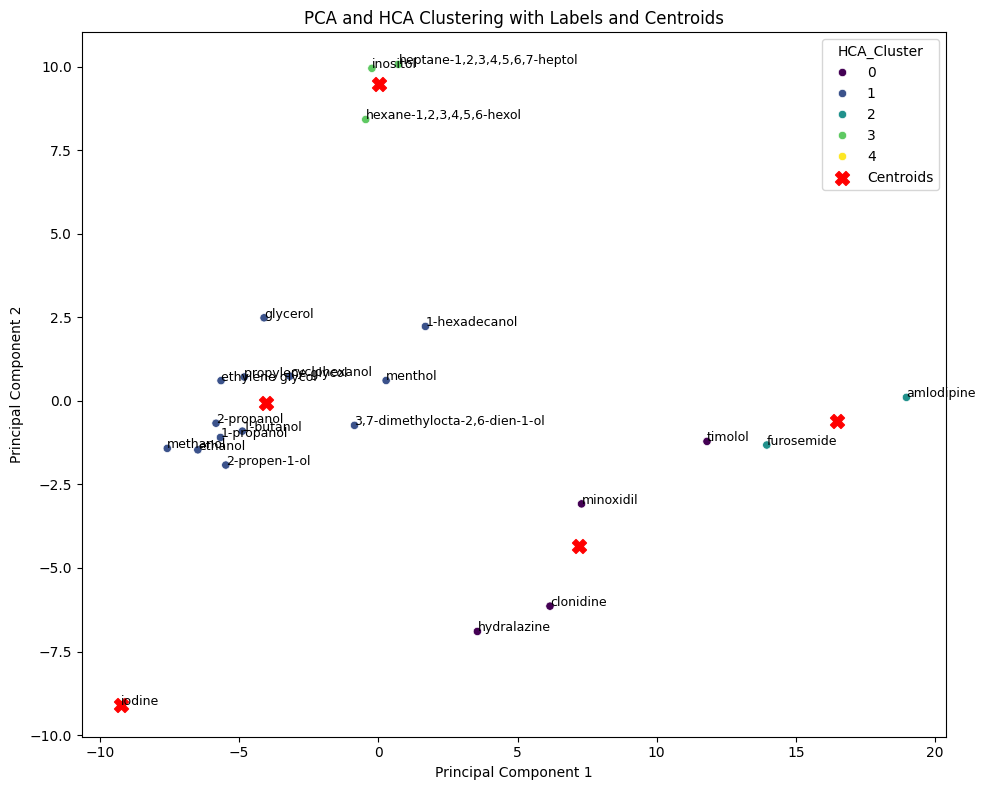

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
dataset_path = 'dataset.xlsx'  # Replace with your actual file path
dataset = pd.read_excel(dataset_path)

# Drop the first column which just seems to be an index.
dataset = dataset.drop(columns=dataset.columns[0])

# Remove rows with NaN values in any column
dataset_cleaned = dataset.dropna()

# Separate out the names for later use
compound_names = dataset_cleaned['Names']

# Standardizing the data (excluding 'Names' and 'Smiles' columns)
scaler = StandardScaler()
numeric_cols = dataset_cleaned.columns.drop(['Names', 'Smiles'])
numeric_scaled_cleaned = scaler.fit_transform(dataset_cleaned[numeric_cols])

# Performing PCA on the cleaned and scaled numeric data
pca = PCA(n_components=2)  # We use 2 components for 2D plotting
pca_result_cleaned = pca.fit_transform(numeric_scaled_cleaned)

# Creating a DataFrame for PCA results
pca_df_cleaned = pd.DataFrame(data=pca_result_cleaned, columns=['PC1', 'PC2'])

# Adding 'Names' to the PCA DataFrame
pca_df_cleaned['Names'] = compound_names.values

# Performing Agglomerative Hierarchical Clustering
hca = AgglomerativeClustering(n_clusters=5)  # Number of clusters can be adjusted
hca_labels = hca.fit_predict(numeric_scaled_cleaned)

# Adding the cluster labels to the DataFrame
pca_df_cleaned['HCA_Cluster'] = hca_labels

# Calculate centroids of each cluster
centroids = []
for label in range(max(hca_labels) + 1):
    centroid = np.mean(pca_result_cleaned[hca_labels == label], axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

# Plotting the results with centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='HCA_Cluster', data=pca_df_cleaned, palette='viridis', legend="full")

# Adding labels to each point
for i, txt in enumerate(pca_df_cleaned['Names']):
    plt.annotate(txt, (pca_df_cleaned['PC1'][i], pca_df_cleaned['PC2'][i]), fontsize=9)

# Adding centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

# Adjusting plot aesthetics
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and HCA Clustering with Labels and Centroids')
plt.legend(title='HCA_Cluster')
plt.tight_layout()

# Show the plot
plt.show()
